# Komal Kale - DS24MS19

### Problem statement 📝🔍
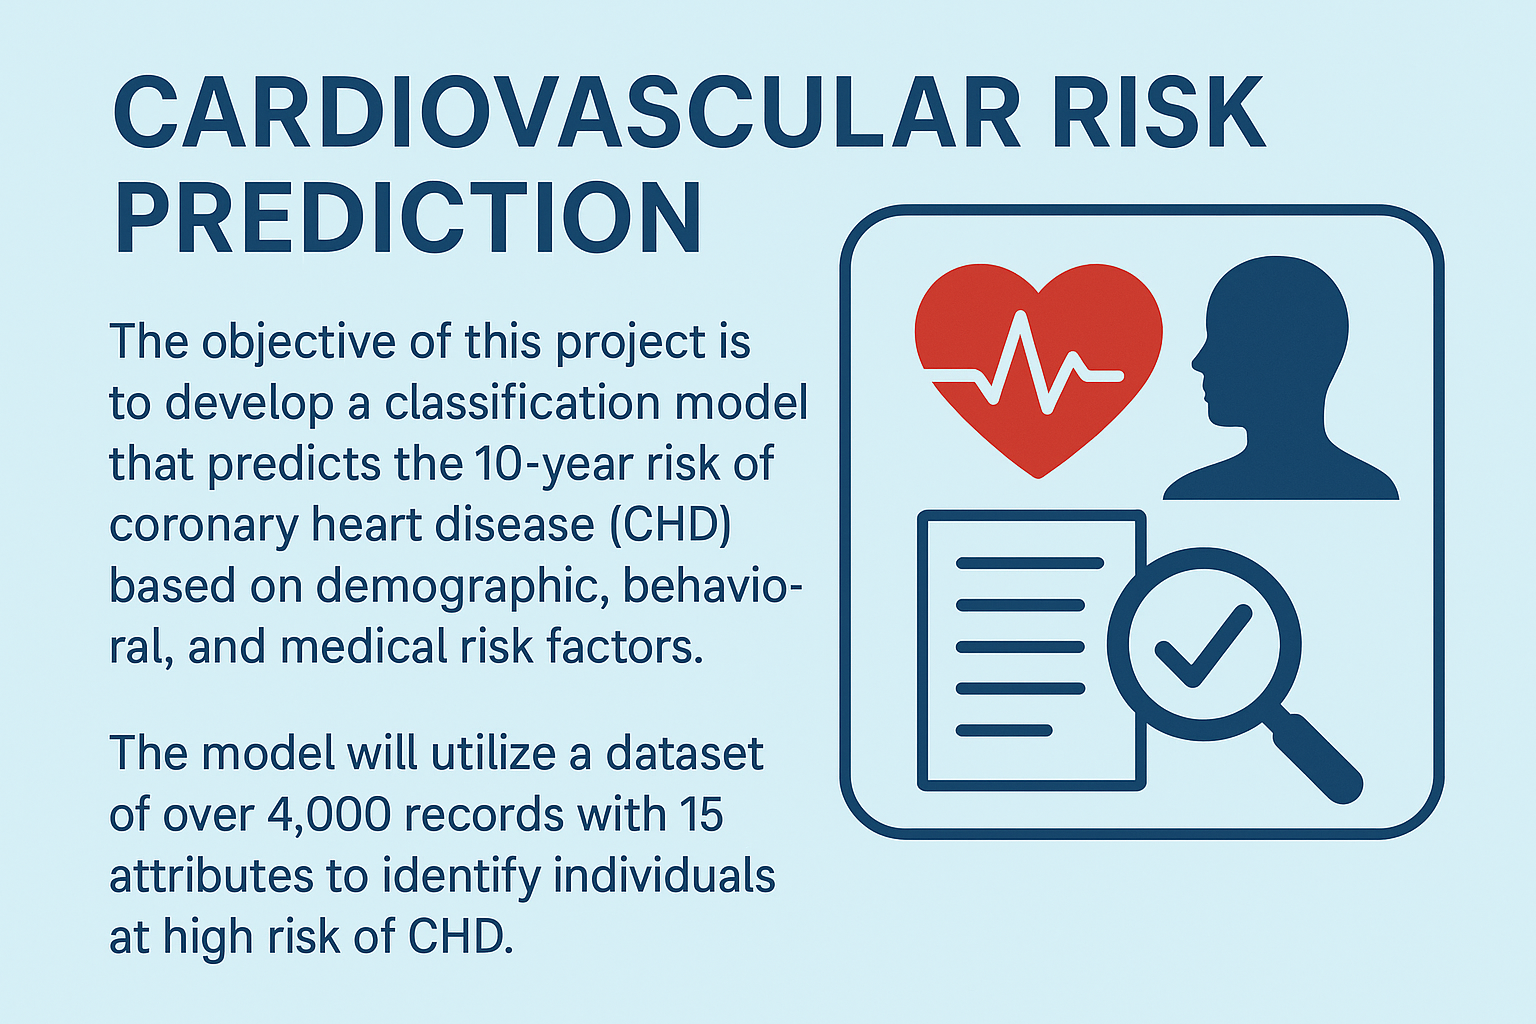

### 🚀 Project Initialization: Import Libraries 📚

In [1]:
import pandas as pd
import numpy as np
from numpy import mean
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score,f1_score, recall_score, precision_score

import warnings

warnings.filterwarnings('ignore')


### Load Dataset 📊

In [2]:

df = pd.read_csv('data_cardiovascular_risk.csv')
df.head()

id  age  education sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
0   0   64        2.0   F        YES         3.0     0.0                0   
1   1   36        4.0   M         NO         0.0     0.0                0   
2   2   46        1.0   F        YES        10.0     0.0                0   
3   3   50        1.0   M        YES        20.0     0.0                0   
4   4   64        1.0   F        YES        30.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    221.0  148.0   85.0    NaN       90.0     80.0   
1             1         0    212.0  168.0   98.0  29.77       72.0     75.0   
2             0         0    250.0  116.0   71.0  20.35       88.0     94.0   
3             1         0    233.0  158.0   88.0  28.26       68.0     94.0   
4             0         0    241.0  136.5   85.0  26.42       70.0     77.0   

   TenYearCHD  
0           1  
1           0  
2           0  
3           1  
4           0

In [27]:
df.shape

(5, 6)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Model            5 non-null      object 
 1   Cross Val Score  5 non-null      float64
 2   Accuracy         5 non-null      float64
 3   Precision        5 non-null      float64
 4   Recall           5 non-null      float64
 5   F1 Score         5 non-null      float64
dtypes: float64(5), object(1)
memory usage: 372.0+ bytes


In [29]:
df.describe().T

count    mean       std    min    25%    50%    75%    max
Cross Val Score    5.0  83.102  3.927903  76.19  83.72  84.84  85.10  85.66
Accuracy           5.0   0.830  0.045277   0.75   0.84   0.85   0.85   0.86
Precision          5.0   0.374  0.302622   0.00   0.22   0.28   0.67   0.70
Recall             5.0   0.088  0.099850   0.00   0.05   0.06   0.07   0.26
F1 Score           5.0   0.110  0.086603   0.00   0.08   0.11   0.12   0.24

In [30]:
df.isnull().sum()

Model              0
Cross Val Score    0
Accuracy           0
Precision          0
Recall             0
F1 Score           0
dtype: int64

In [3]:
# Define features and target
df_columns = df.columns
features = df_columns[:-1]
target = df_columns[-1]

### Data Cleaning 
○ Handle missing values
○ Convert data types
○ Remove duplicates

In [4]:
# Handle missing values
# Drop 'id' column if present
if 'id' in df.columns:
    df = df.drop('id', axis=1)
df

age  education sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
0      64        2.0   F        YES         3.0     0.0                0   
1      36        4.0   M         NO         0.0     0.0                0   
2      46        1.0   F        YES        10.0     0.0                0   
3      50        1.0   M        YES        20.0     0.0                0   
4      64        1.0   F        YES        30.0     0.0                0   
...   ...        ...  ..        ...         ...     ...              ...   
3385   60        1.0   F         NO         0.0     0.0                0   
3386   46        1.0   F         NO         0.0     0.0                0   
3387   44        3.0   M        YES         3.0     0.0                0   
3388   60        1.0   M         NO         0.0     NaN                0   
3389   54        3.0   F         NO         0.0     0.0                0   

      prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  \
0                0         0    221.0  148.0   85.0    NaN       90.0   
1                1         0    212.0  168.0   98.0  29.77       72.0   
2                0         0    250.0  116.0   71.0  20.35       88.0   
3                1         0    233.0  158.0   88.0  28.26       68.0   
4                0         0    241.0  136.5   85.0  26.42       70.0   
...            ...       ...      ...    ...    ...    ...        ...   
3385             0         0    261.0  123.5   79.0  29.28       70.0   
3386             0         0    199.0  102.0   56.0  21.96       80.0   
3387             1         0    352.0  164.0  119.0  28.92       73.0   
3388             1         0    191.0  167.0  105.0  23.01       80.0   
3389             0         0    288.0  124.0   77.0  29.88       79.0   

      glucose  TenYearCHD  
0        80.0           1  
1        75.0           0  
2        94.0           0  
3        94.0           1  
4        77.0           0  
...       ...         ...  
3385    103.0           0  
3386     84.0           0  
3387     72.0           1  
3388     85.0           0  
3389     92.0           0  

[3390 rows x 16 columns]

In [5]:
# Remove duplicates
df = df.drop_duplicates()
df

age  education sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
0      64        2.0   F        YES         3.0     0.0                0   
1      36        4.0   M         NO         0.0     0.0                0   
2      46        1.0   F        YES        10.0     0.0                0   
3      50        1.0   M        YES        20.0     0.0                0   
4      64        1.0   F        YES        30.0     0.0                0   
...   ...        ...  ..        ...         ...     ...              ...   
3385   60        1.0   F         NO         0.0     0.0                0   
3386   46        1.0   F         NO         0.0     0.0                0   
3387   44        3.0   M        YES         3.0     0.0                0   
3388   60        1.0   M         NO         0.0     NaN                0   
3389   54        3.0   F         NO         0.0     0.0                0   

      prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  \
0                0         0    221.0  148.0   85.0    NaN       90.0   
1                1         0    212.0  168.0   98.0  29.77       72.0   
2                0         0    250.0  116.0   71.0  20.35       88.0   
3                1         0    233.0  158.0   88.0  28.26       68.0   
4                0         0    241.0  136.5   85.0  26.42       70.0   
...            ...       ...      ...    ...    ...    ...        ...   
3385             0         0    261.0  123.5   79.0  29.28       70.0   
3386             0         0    199.0  102.0   56.0  21.96       80.0   
3387             1         0    352.0  164.0  119.0  28.92       73.0   
3388             1         0    191.0  167.0  105.0  23.01       80.0   
3389             0         0    288.0  124.0   77.0  29.88       79.0   

      glucose  TenYearCHD  
0        80.0           1  
1        75.0           0  
2        94.0           0  
3        94.0           1  
4        77.0           0  
...       ...         ...  
3385    103.0           0  
3386     84.0           0  
3387     72.0           1  
3388     85.0           0  
3389     92.0           0  

[3390 rows x 16 columns]

In [6]:
# Check missing values
missing = df.isnull().sum()
missing

age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [7]:
# Convert categorical columns
df['sex'] = df['sex'].map({'F': 0, 'M': 1})
df['is_smoking'] = df['is_smoking'].map({'NO': 0, 'YES': 1})

In [8]:
# Impute numerical columns with mean, categorical with mode
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = ['sex', 'is_smoking']

for col in num_cols:
    df[col] = df[col].fillna(df[col].mean())
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

### Exploratory Data Analysis (EDA) 📊


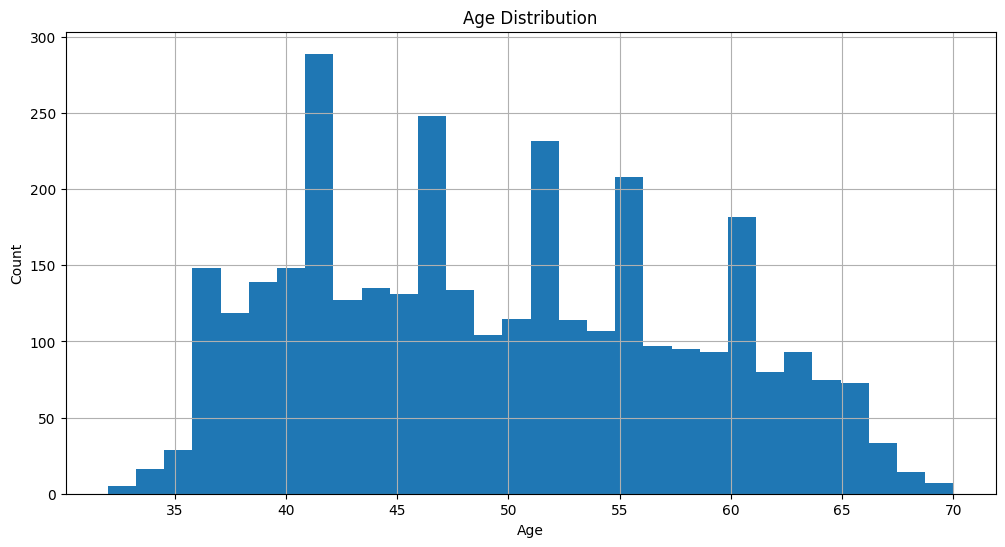

In [9]:
# Univariate analysis
plt.figure(figsize=(12,6))
df['age'].hist(bins=30)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

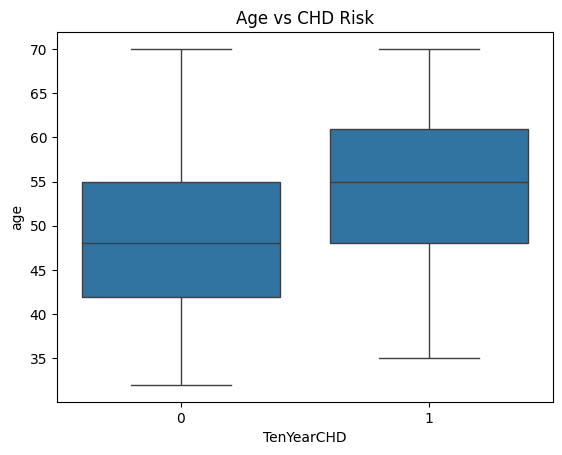

In [10]:
# Bivariate analysis
sns.boxplot(x='TenYearCHD', y='age', data=df)
plt.title('Age vs CHD Risk')
plt.show()

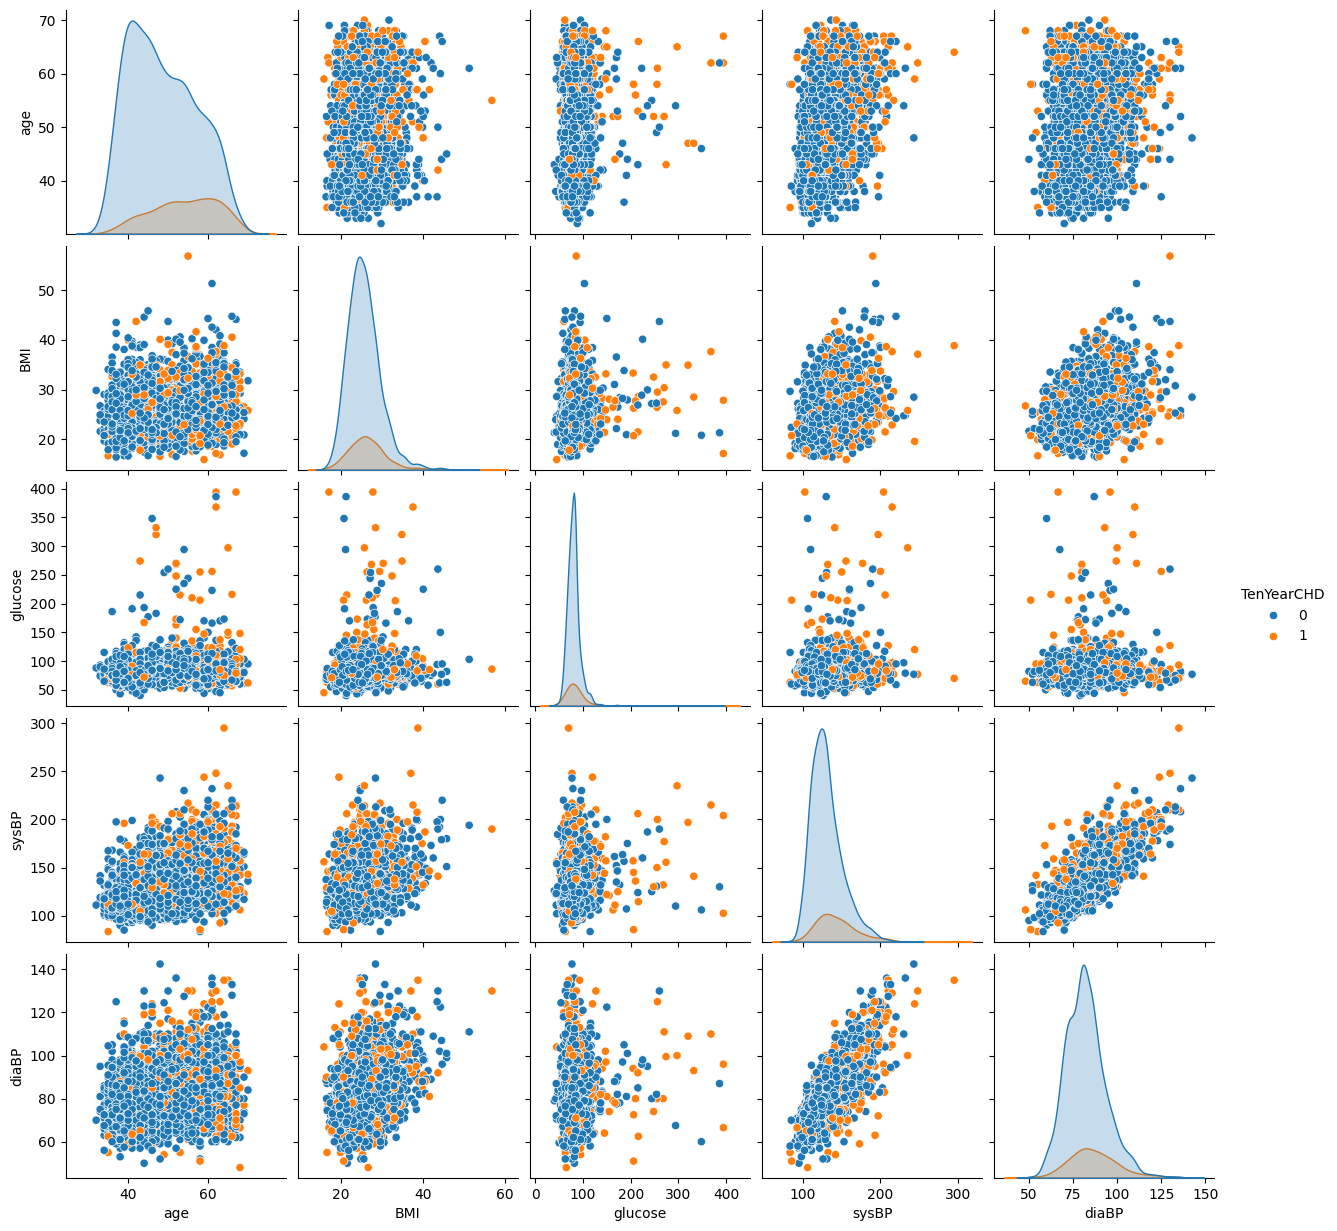

In [11]:
sns.pairplot(df[['age', 'BMI', 'glucose', 'sysBP', 'diaBP', 'TenYearCHD']], hue='TenYearCHD')

### Correlation analysis 🔍

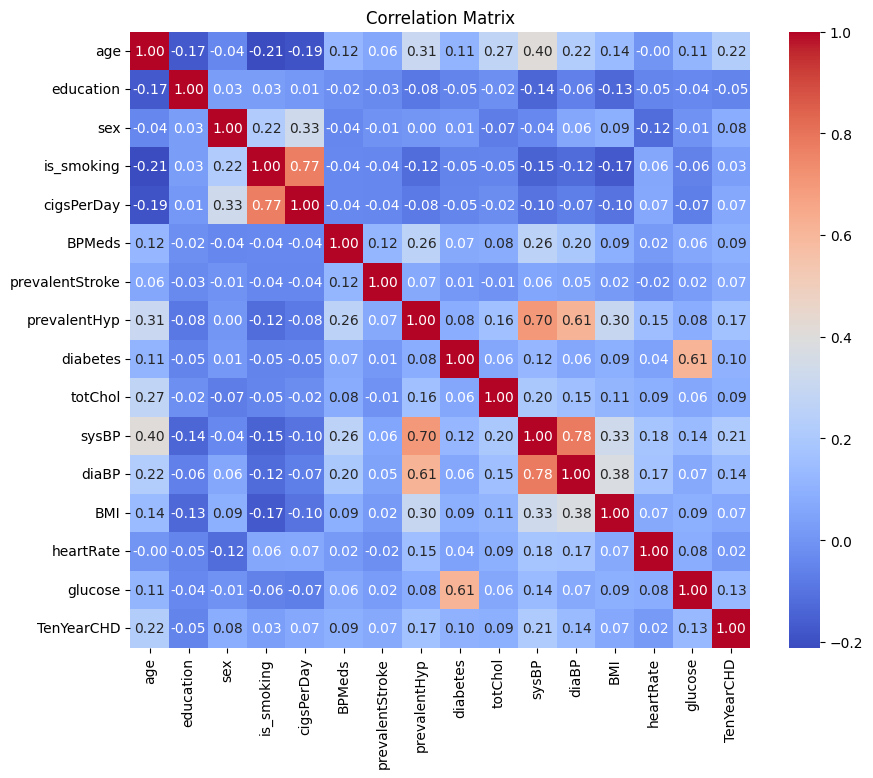

In [12]:
# Select only numeric columns for correlation analysis
numeric_df = df.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

### Outlier treatment 🚫

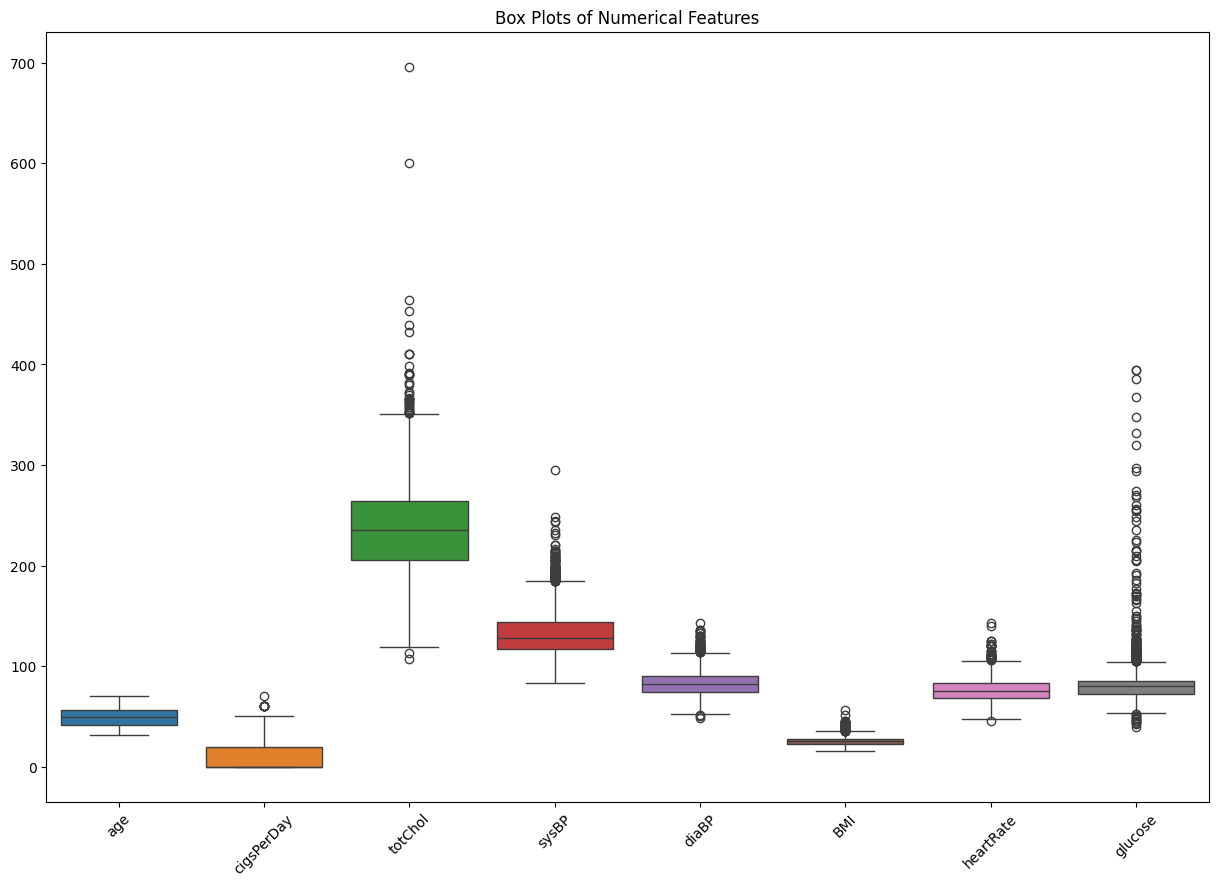

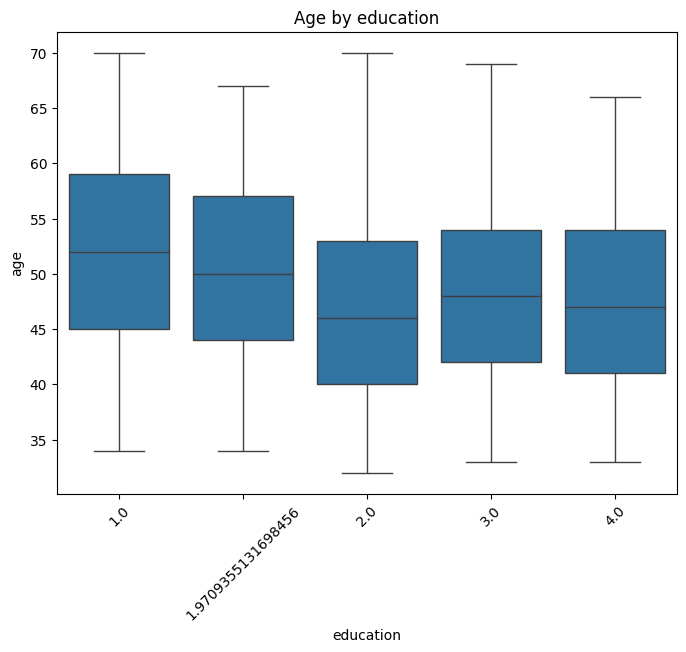

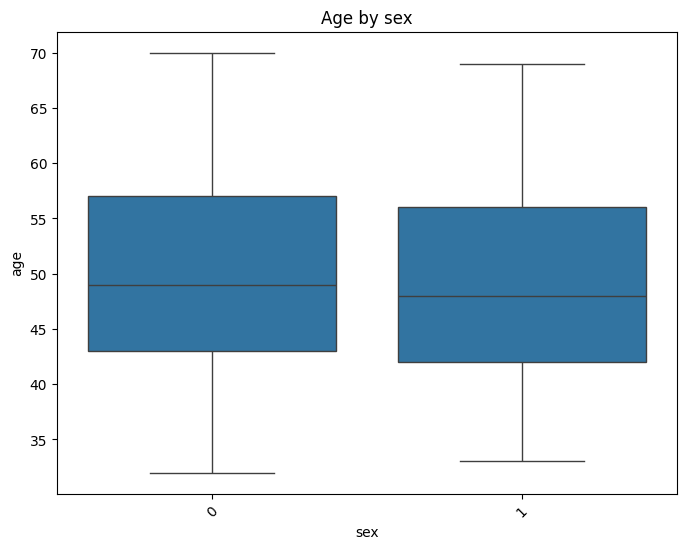

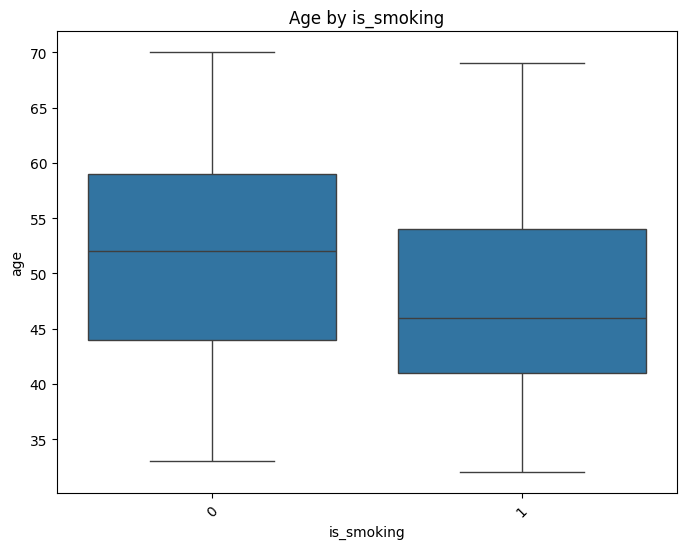

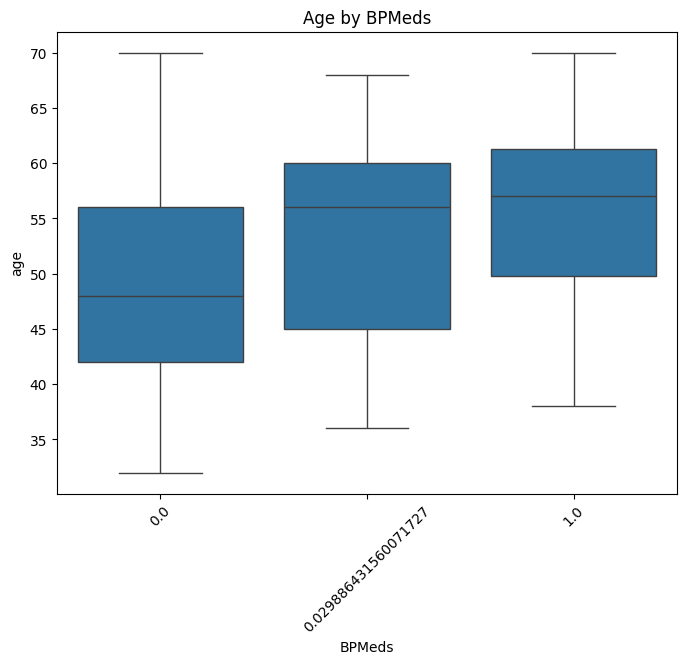

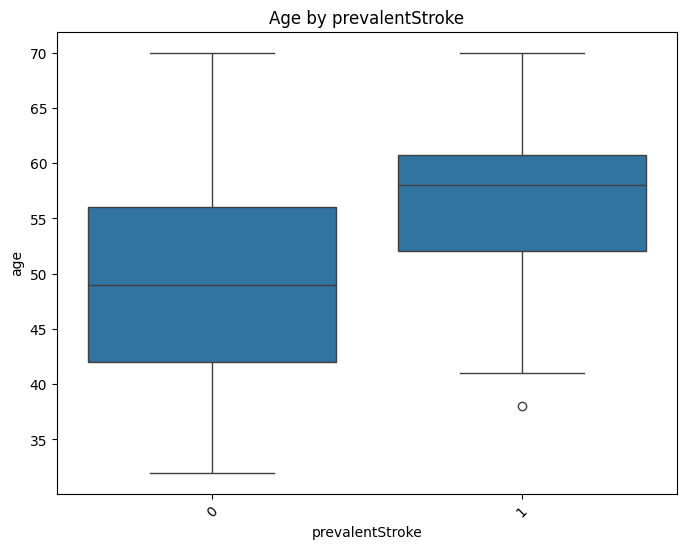

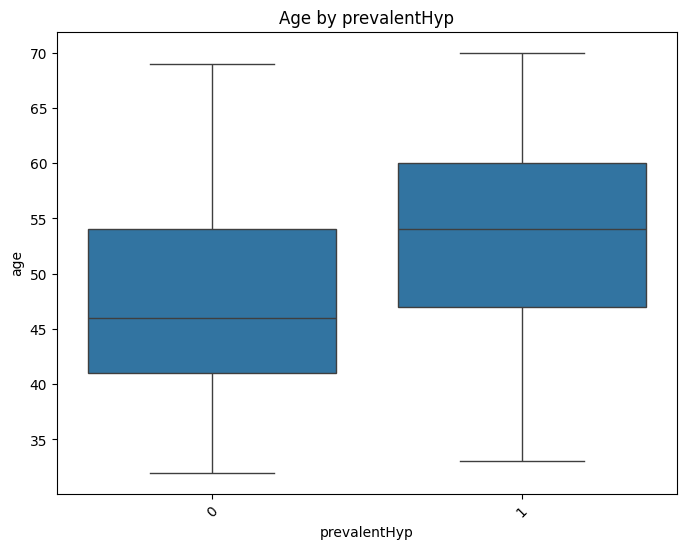

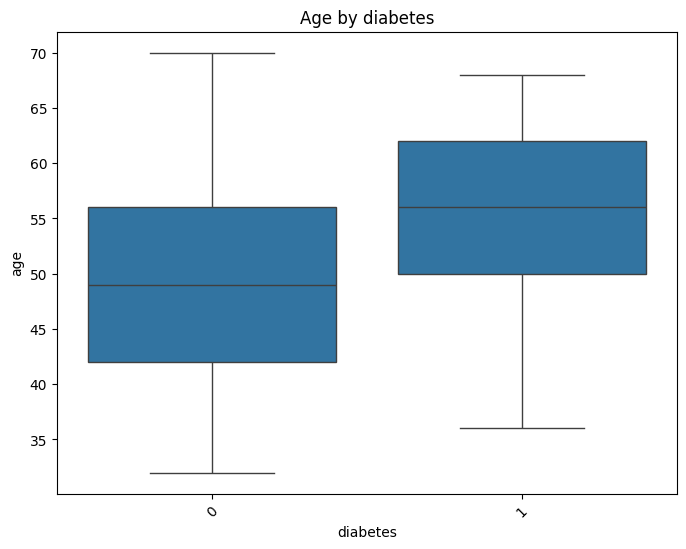

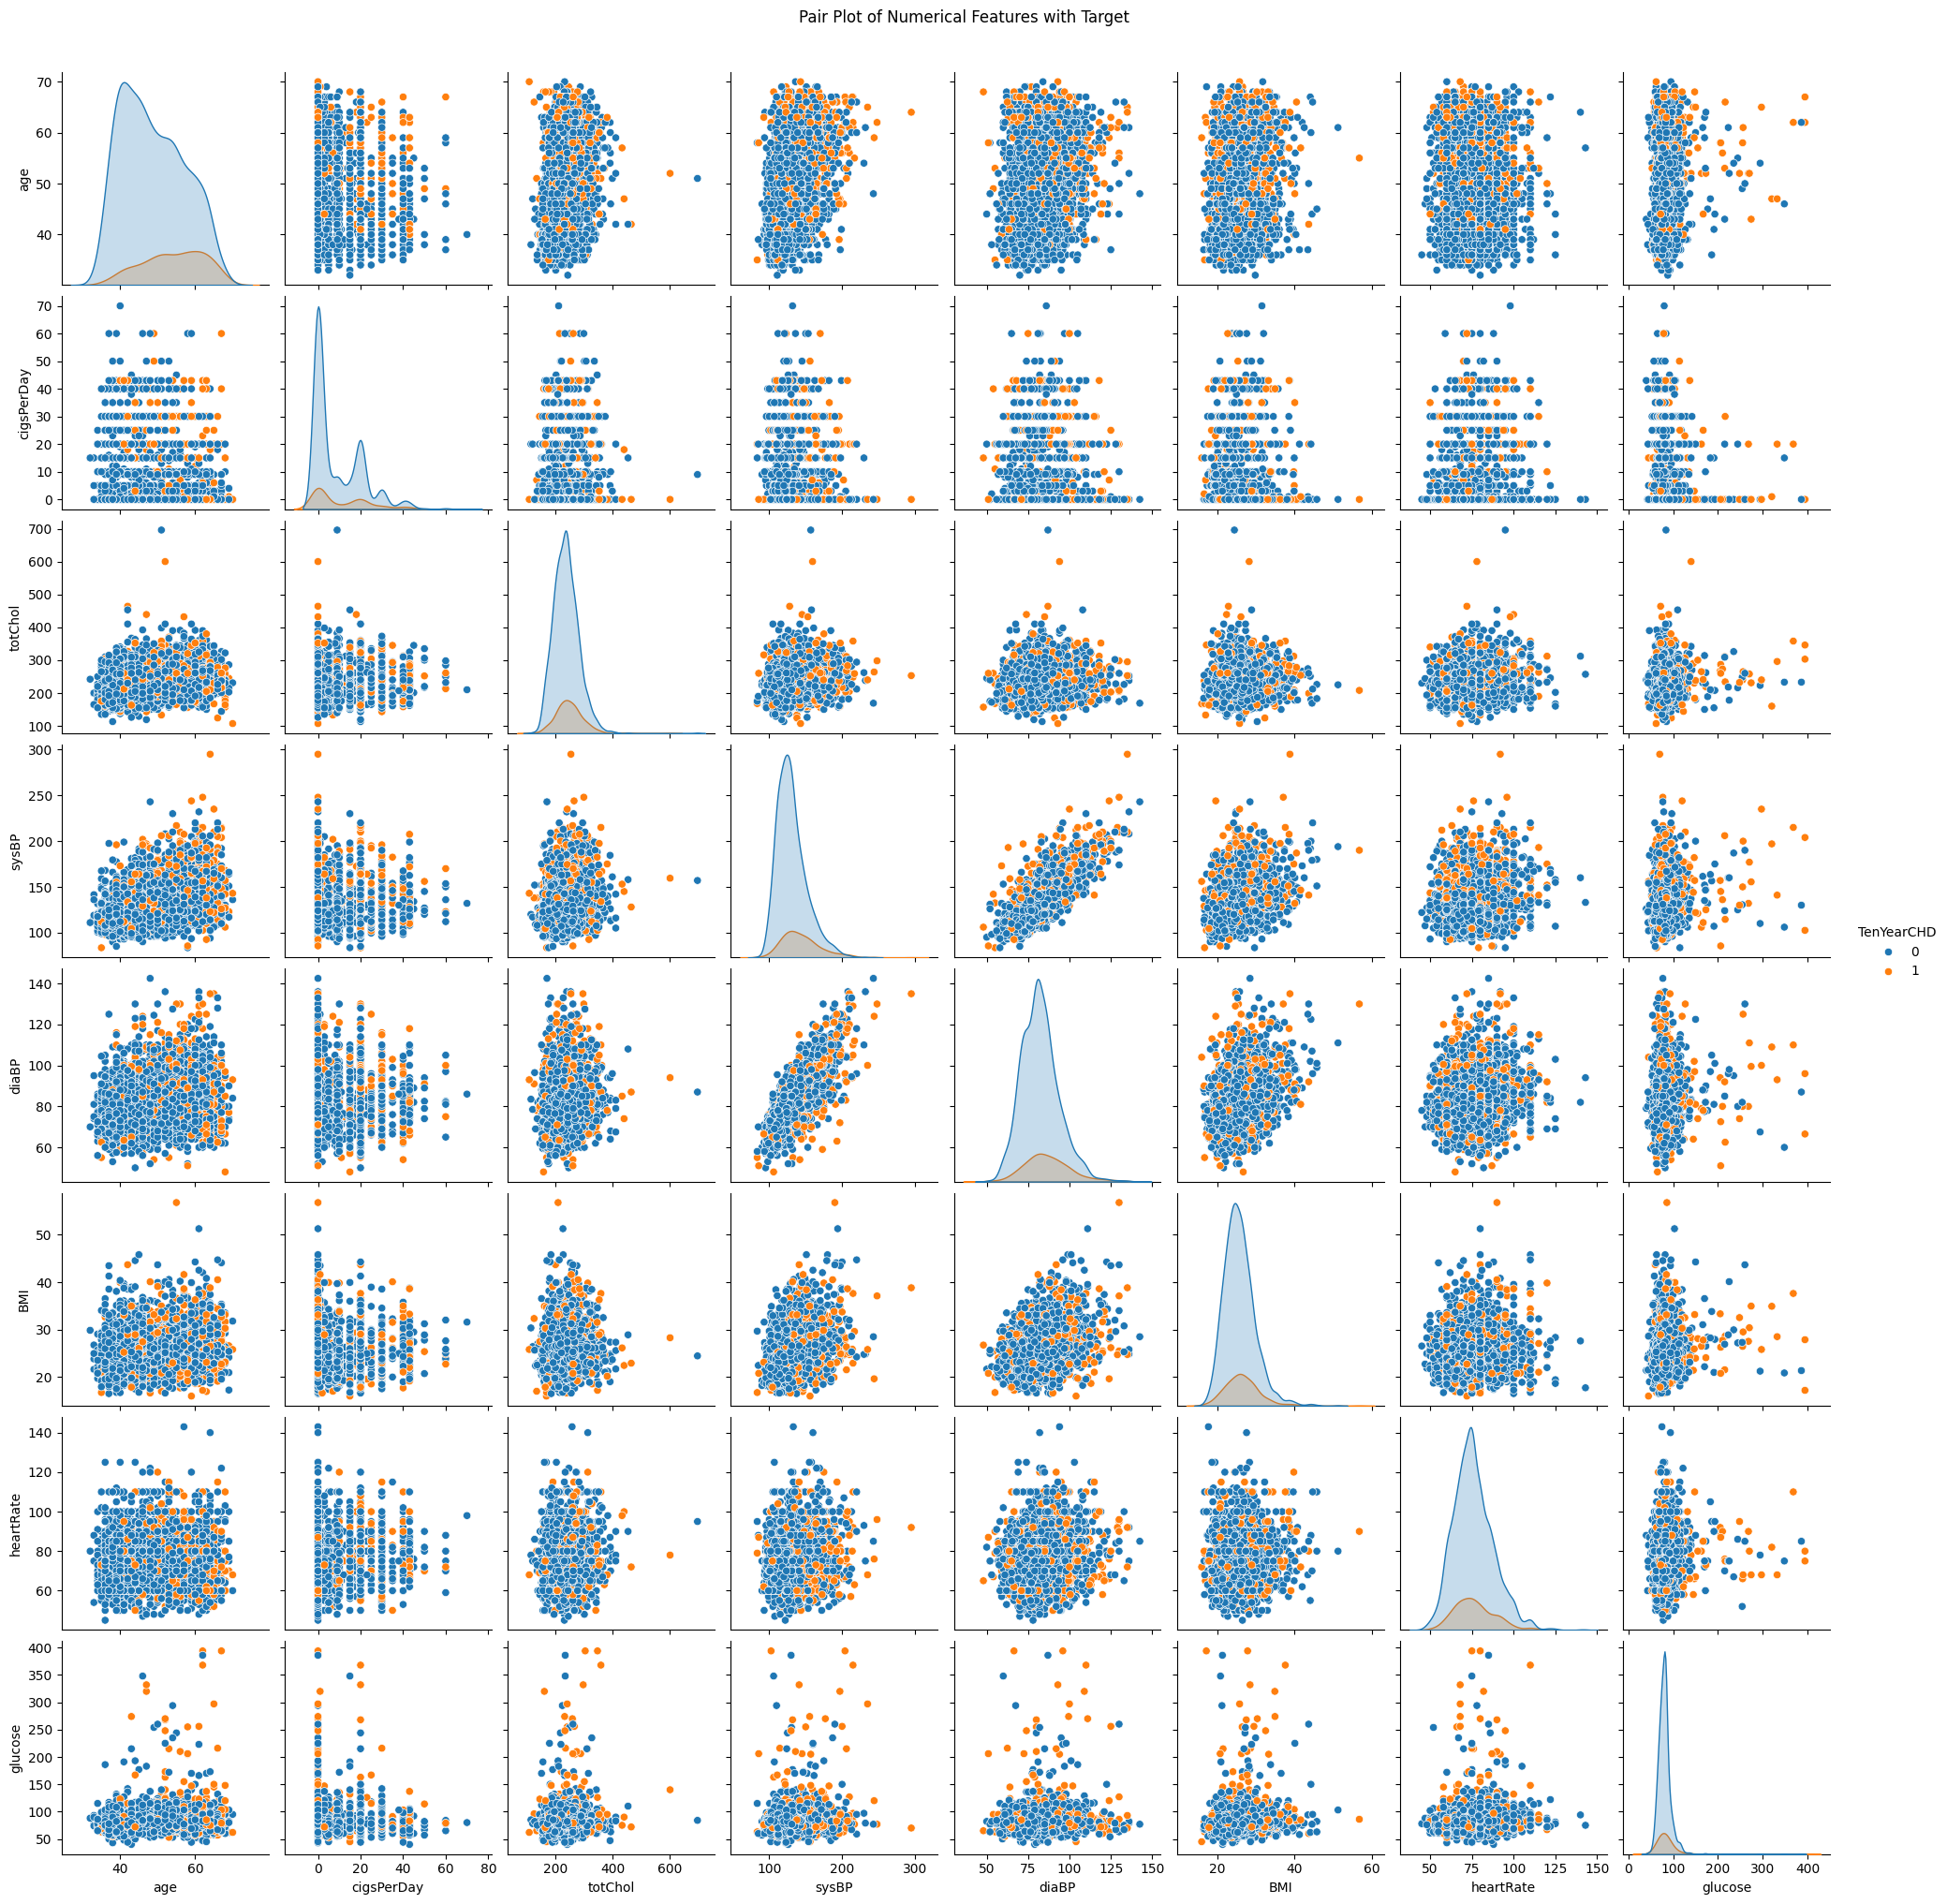

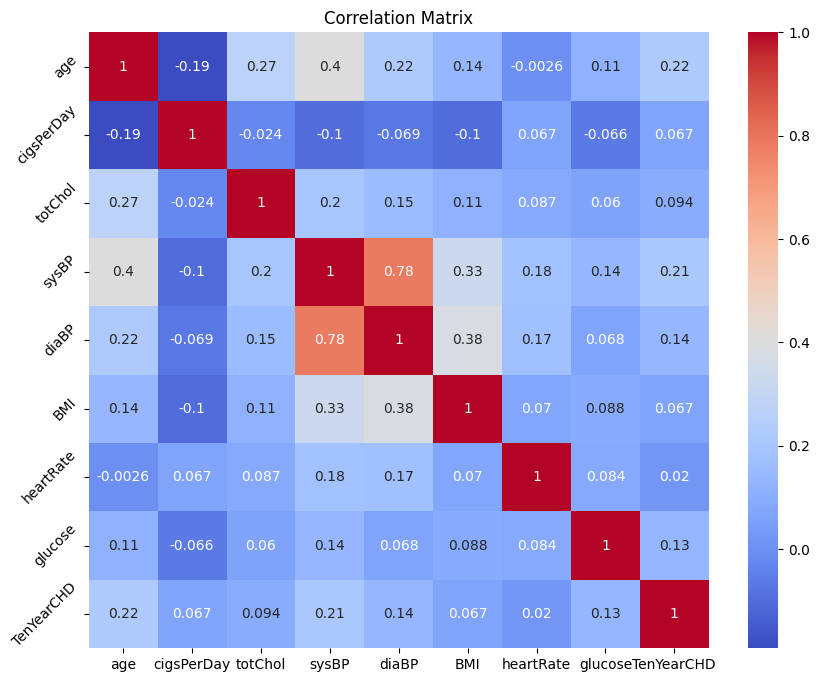

In [13]:
numerical_features = ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
categorical_features = ['education', 'sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']


plt.figure(figsize=(15, 10))
sns.boxplot(data=df[numerical_features], orient="v")
plt.title('Box Plots of Numerical Features')
plt.xticks(rotation=45)
plt.show()


for col in categorical_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=col, y='age', data=df)
    plt.title(f'Age by {col}')
    plt.xticks(rotation=45)
    plt.show()
    
sns.pairplot(df[numerical_features + [target]], hue=target, diag_kind='kde')
plt.suptitle('Pair Plot of Numerical Features with Target', y=1.02)
plt.show()

corr_matrix = df[numerical_features + [target]].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.yticks(rotation=45)
plt.show()


### Check distributions & apply transformations (if needed)
○ Skewness/Kurtosis
○ Log Transformation, sqrt

In [14]:
# Skewness
for col in ['totChol', 'sysBP', 'diaBP', 'glucose']:
    print(f"{col} Skewness: {df[col].skew():.2f}")

totChol Skewness: 0.95
sysBP Skewness: 1.18
diaBP Skewness: 0.72
glucose Skewness: 6.44


In [15]:

# Log-transform skewed columns
for col in ['totChol', 'glucose']:
    df[col] = np.log1p(df[col])

### Feature engineering ⚙️

In [16]:
if df['education'].dtype != np.number:
    df = pd.get_dummies(df, columns=['education'], drop_first=True)

### Split data into train/test sets 💻

In [17]:
X = df.drop('TenYearCHD', axis=1)
y = df['TenYearCHD']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### Feature Scaling

In [18]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Evaluate model performance using Confusion Metrics ⚖️
○ Accuracy
○ Precision
○ Recall
○ F1 Score


In [19]:
def evaluate_model(model, X_train, y_train, X_test, y_test, name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\n{name} Results:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

### Logistic Regression


Logistic Regression Results:
Accuracy: 0.8539823008849557
Precision: 0.6666666666666666
Recall: 0.058823529411764705
F1 Score: 0.10810810810810811
Confusion Matrix:
 [[573   3]
 [ 96   6]]


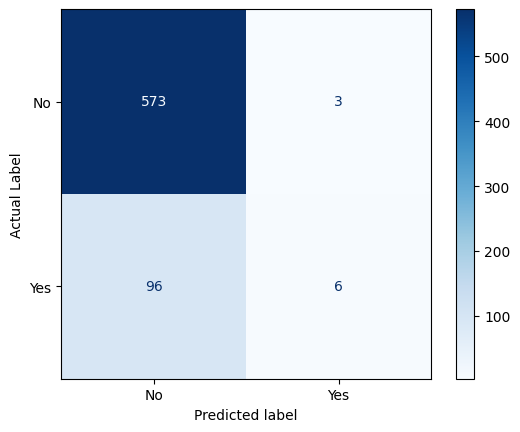

In [20]:

lr = LogisticRegression(max_iter=1000)
evaluate_model(lr, X_train_scaled, y_train, X_test_scaled, y_test, "Logistic Regression")



y_pred = lr.predict(X_test_scaled)
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=['No', 'Yes'])
disp.plot(cmap='Blues')
plt.ylabel('Actual Label')
plt.show()

### Decision Tree


Decision Tree Results:
Accuracy: 0.7522123893805309
Precision: 0.225
Recall: 0.2647058823529412
F1 Score: 0.24324324324324326
Confusion Matrix:
 [[483  93]
 [ 75  27]]


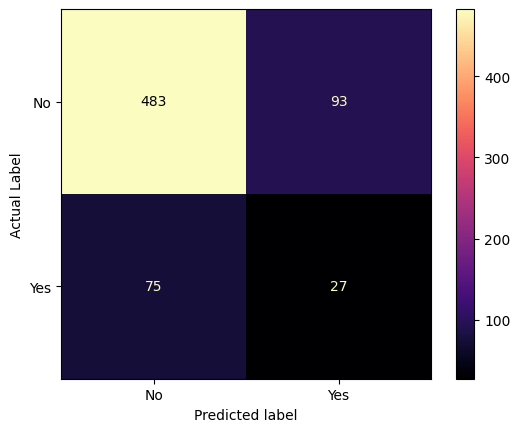

In [21]:

dt = DecisionTreeClassifier(random_state=42)
evaluate_model(dt, X_train, y_train, X_test, y_test, "Decision Tree")


y_pred = dt.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=['No', 'Yes'])
disp.plot(cmap='magma')
plt.ylabel('Actual Label')
plt.show()

### Random Forest


Random Forest Results:
Accuracy: 0.855457227138643
Precision: 0.7
Recall: 0.06862745098039216
F1 Score: 0.125
Confusion Matrix:
 [[573   3]
 [ 95   7]]


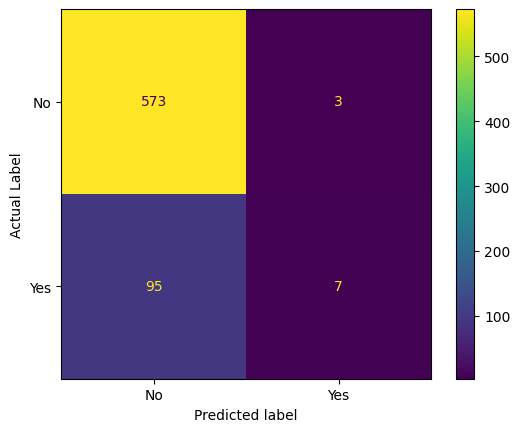

In [22]:

rf = RandomForestClassifier(random_state=42)
evaluate_model(rf, X_train, y_train, X_test, y_test, "Random Forest")

y_pred = rf.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=['No', 'Yes'])
disp.plot(cmap='viridis')
plt.ylabel('Actual Label')
plt.show()

### Support Vector Machine


Support Vector Machine Results:
Accuracy: 0.8480825958702065
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
Confusion Matrix:
 [[575   1]
 [102   0]]


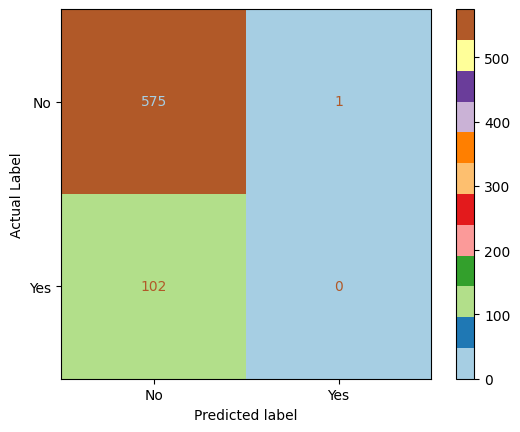

In [23]:

svc = SVC()
evaluate_model(svc, X_train_scaled, y_train, X_test_scaled, y_test, "Support Vector Machine")



y_pred = svc.predict(X_test_scaled)
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=['No', 'Yes'])
disp.plot(cmap='Paired')
plt.ylabel('Actual Label')
plt.show()

### K Nearest Neighbors


K Nearest Neighbors Results:
Accuracy: 0.8377581120943953
Precision: 0.2777777777777778
Recall: 0.049019607843137254
F1 Score: 0.08333333333333333
Confusion Matrix:
 [[563  13]
 [ 97   5]]


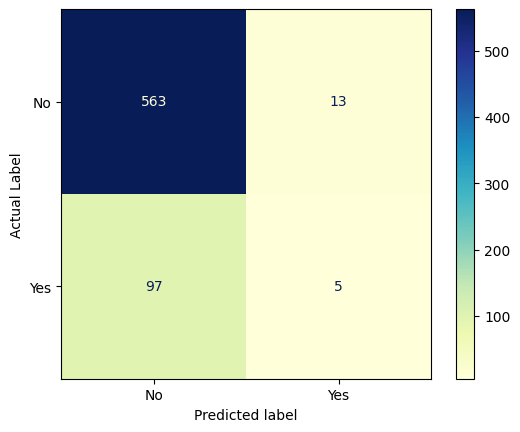

In [24]:

knn = KNeighborsClassifier()
evaluate_model(knn, X_train_scaled, y_train, X_test_scaled, y_test, "K Nearest Neighbors")

y_pred = knn.predict(X_test_scaled)
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=['No', 'Yes'])
disp.plot(cmap='YlGnBu')
plt.ylabel('Actual Label')
plt.show()

### Cross-Validation Results 🔁


In [25]:
models = [
    ('Logistic Regression', lr),
    ('Decision Tree', dt),
    ('Random Forest', rf),
    ('Support Vector Machine', svc),
    ('K Nearest Neighbors', knn)
]

print("\nCross Validation Scores (Accuracy, 5-fold):")
for name, model in models:
    if name in ['Logistic Regression', 'Support Vector Machine', 'K Nearest Neighbors']:
        scores = cross_val_score(model, scaler.transform(X), y, cv=5, scoring='accuracy')
    else:
        scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    print(f"{name}: {scores.mean()*100}")


Cross Validation Scores (Accuracy, 5-fold):
Logistic Regression: 85.6637168141593
Decision Tree: 76.19469026548673
Random Forest: 85.10324483775811
Support Vector Machine: 84.83775811209439
K Nearest Neighbors: 83.71681415929203


In [26]:
import pandas as pd
from tabulate import tabulate

# Create a dictionary with your model evaluation data
data = {
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 
              'Support Vector Machine', 'K Nearest Neighbors'],
    'Cross Val Score': [85.6637168141593, 76.19469026548673, 85.10324483775811, 
                        84.83775811209439, 83.71681415929203],
    'Accuracy': [0.8539823008849557, 0.7522123893805309, 0.855457227138643, 
                 0.8480825958702065, 0.8377581120943953],
    'Precision': [0.6666666666666666, 0.225, 0.7, 0.0, 0.2777777777777778],
    'Recall': [0.058823529411764705, 0.2647058823529412, 0.06862745098039216, 
               0.0, 0.049019607843137254],
    'F1 Score': [0.10810810810810811, 0.24324324324324326, 0.125, 0.0, 0.08333333333333333]
    
}

# Convert the dictionary to a Pandas DataFrame
df = pd.DataFrame(data)

# Round the values to 2 decimal places
df = df.round(2)


# Display the table using tabulate for better formatting
print(tabulate(df, headers='keys', tablefmt='fancy_grid', showindex=False))


╒════════════════════════╤═══════════════════╤════════════╤═════════════╤══════════╤════════════╕
│ Model                  │   Cross Val Score │   Accuracy │   Precision │   Recall │   F1 Score │
╞════════════════════════╪═══════════════════╪════════════╪═════════════╪══════════╪════════════╡
│ Logistic Regression    │             85.66 │       0.85 │        0.67 │     0.06 │       0.11 │
├────────────────────────┼───────────────────┼────────────┼─────────────┼──────────┼────────────┤
│ Decision Tree          │             76.19 │       0.75 │        0.22 │     0.26 │       0.24 │
├────────────────────────┼───────────────────┼────────────┼─────────────┼──────────┼────────────┤
│ Random Forest          │             85.1  │       0.86 │        0.7  │     0.07 │       0.12 │
├────────────────────────┼───────────────────┼────────────┼─────────────┼──────────┼────────────┤
│ Support Vector Machine │             84.84 │       0.85 │        0    │     0    │       0    │
├───────────────────

### Conclusion 🏁

### Cardiovascular Risk Prediction: Model Evaluation 🏗️

### 🖊️ Author